zero_city기반과 fill_any 기반의 두가지 모델의 크롤링 이미지 검출 비교

In [7]:
#calculate average confidence score

import os

# Set the path to the directory containing the YOLO detection label files
dir_path = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\zero_city_taxi\\labels'

# Create an empty dictionary to store the total confidence scores and counts for each class
class_totals = {}
total_files_with_detection = 0

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        if lines:
            total_files_with_detection += 1

        # Loop through each line and update the class_totals dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_totals:
                class_totals[class_num] = {'total': 0, 'count': 0}
            class_totals[class_num]['total'] += confidence
            class_totals[class_num]['count'] += 1

# Calculate the average confidence score for each class and print the results
for class_num, totals in class_totals.items():
    avg_confidence = totals['total'] / totals['count']
    count = totals['count']
    print(f'Class {class_num}: {avg_confidence:.4f}')
    print(f'Count = {count}')

print(f'Total files with detections: {total_files_with_detection}')

Class 2: 0.8867
Count = 2
Total files with detections: 1


**각 모델, 특수 차량별 평균 cofidence값, 탐지 개수**

zero_city : ambulance - 0 / count 0 / txt 0 / class 9

            firetruck - 0 / count 0 / txt 0 / class 10

            taxi - 0.8867 / count 2 / txt 1 / class 2

            truck - 0.6644 / count 173 / txt 82 / class 4

fill_any :  ambulance - 0.9590 / count 1 / txt 1 / class 9

            firetruck - 0.7521 / count 65 / txt 51 / class 10

            taxi - 0.7300 / count 14 / txt 8 / class 2
            
            truck - 0.7002 / count 125 / txt 71 / class 4

수치적으로 유의미하다고 할 수 있는 taxi와 truck의 경우 찾은 confidence는 증가하였지만 전체적으로 avg_confidence는 감소하였음을 알 수 있다.

zero_city의 경우 ambulance와 firetruck은 객체를 검지하지 못하였고, taxi의 경우도 100개중 1개의 이미지에서만 검지, truck이 대체적으로 잘 검지되는 것으로 보임

fill_any도 역시 ambulance는 1개만 검지를 하여 유의미하지 않음, firetruck의 경우 상당히 값이 증가하여 유의미함을 알 수 있다.

taxi도 크게 증가는 아니지만 검지수가 유의미하게 증가함, truck은 검지된 개수는 줄었지만 정확도는 올라서 이 또한 유의미하다고 판단됨

In [16]:
#각 라벨마다 이름 새롭게 변경

import os

dir_path = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\fill_any_ambulance\\labels'  # 파일들이 있는 디렉토리 경로
suffix = '_f_ambulance'  # 파일명 뒤에 추가로 입력할 문자열

for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        old_filepath = os.path.join(dir_path, filename)
        new_filename = filename[:-4] + suffix + filename[-4:]  # 기존 파일명에서 확장자를 제외하고, 추가 문자열과 확장자를 연결하여 새로운 파일명 생성
        new_filepath = os.path.join(dir_path, new_filename)
        os.rename(old_filepath, new_filepath)

        print(f'Renamed: {filename} -> {new_filename}')

Renamed: 32.txt -> 32_f_ambulance.txt


zero_city 분포(ambulance가 감지 안되어서 클래스 3개) // class 2(taxi),4(truck),9(ambulance),10(firetruck)

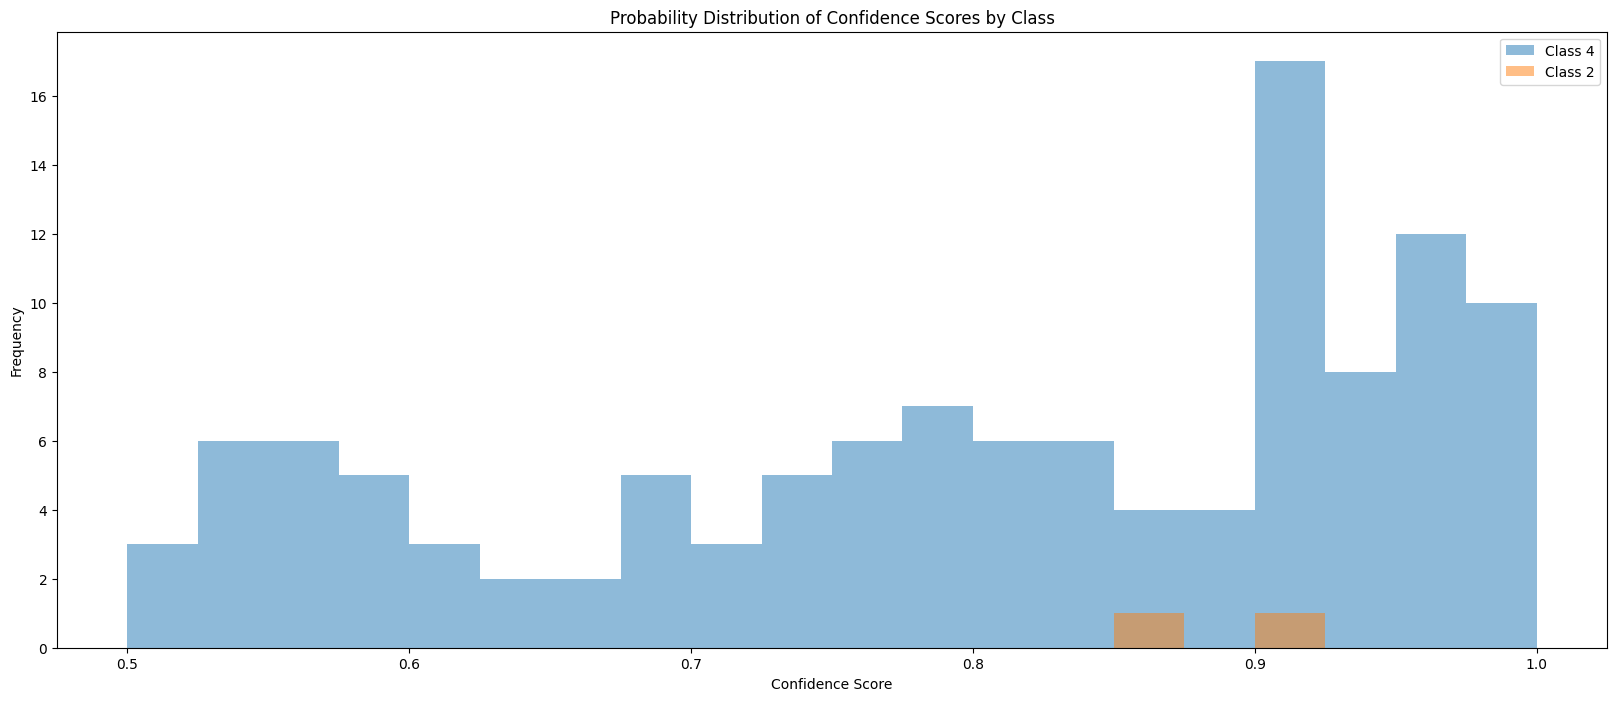

In [17]:
#calculate probability distribution with histogram
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\labels\\zerocity_0.5'

# Create an empty dictionary to store the confidence scores for each class
class_scores = {}

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores:
                class_scores[class_num] = []
            class_scores[class_num].append(confidence)

fig = plt.subplots(figsize=(20, 8))

# Create a histogram of the confidence scores for each class
for class_num, scores in class_scores.items():
    plt.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num}')

# Add labels and legend to the plot
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Confidence Scores by Class')
plt.legend()

# Show the plot
plt.show()

fill_any 분포 // class 2(taxi),4(truck),9(ambulance),10(firetruck)

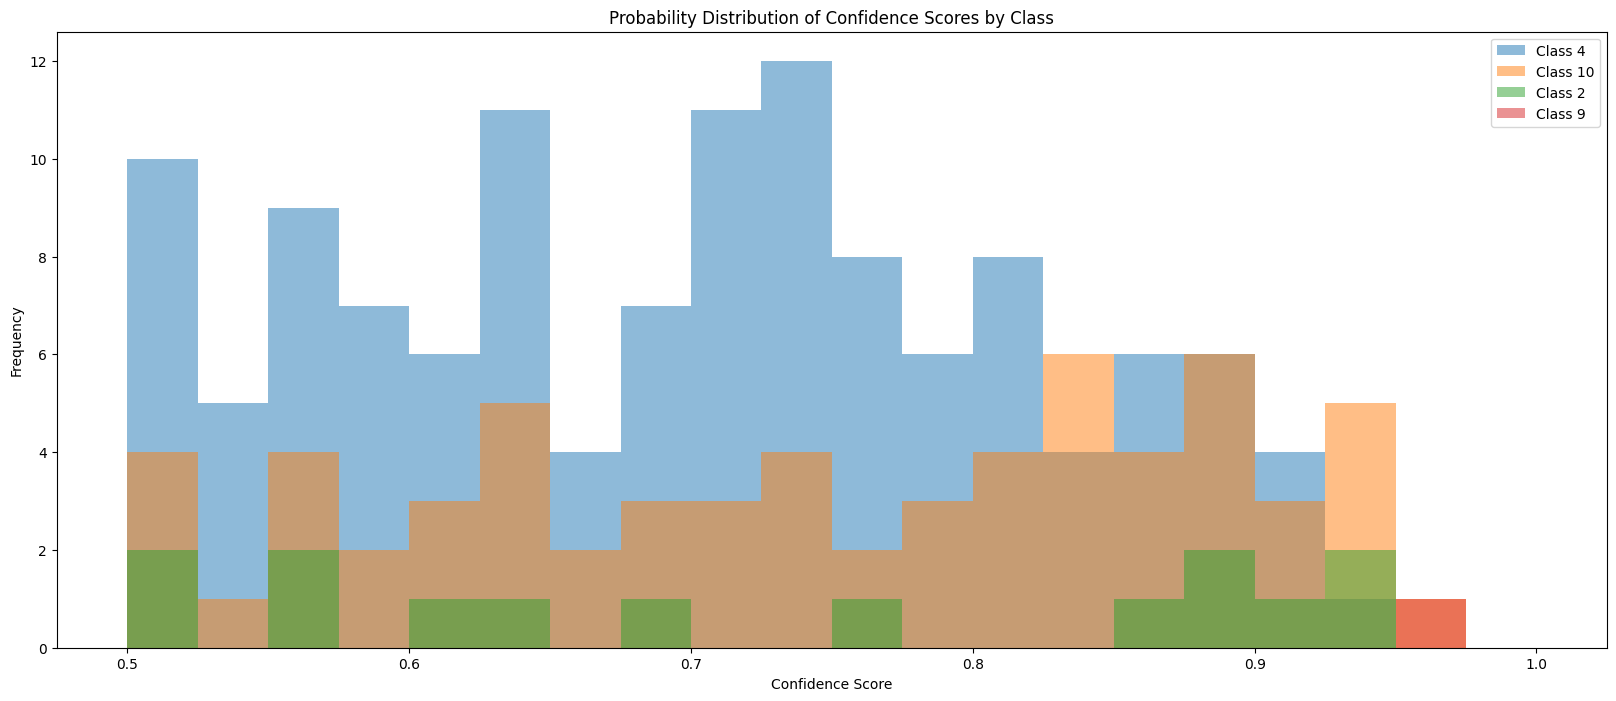

In [18]:
#calculate probability distribution with histogram
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\labels\\fillany_0.5'

# Create an empty dictionary to store the confidence scores for each class
class_scores = {}

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores:
                class_scores[class_num] = []
            class_scores[class_num].append(confidence)

fig = plt.subplots(figsize=(20, 8))

# Create a histogram of the confidence scores for each class
for class_num, scores in class_scores.items():
    plt.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num}')

# Add labels and legend to the plot
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Confidence Scores by Class')
plt.legend()

# Show the plot
plt.show()

zero_city 각 라벨 분포

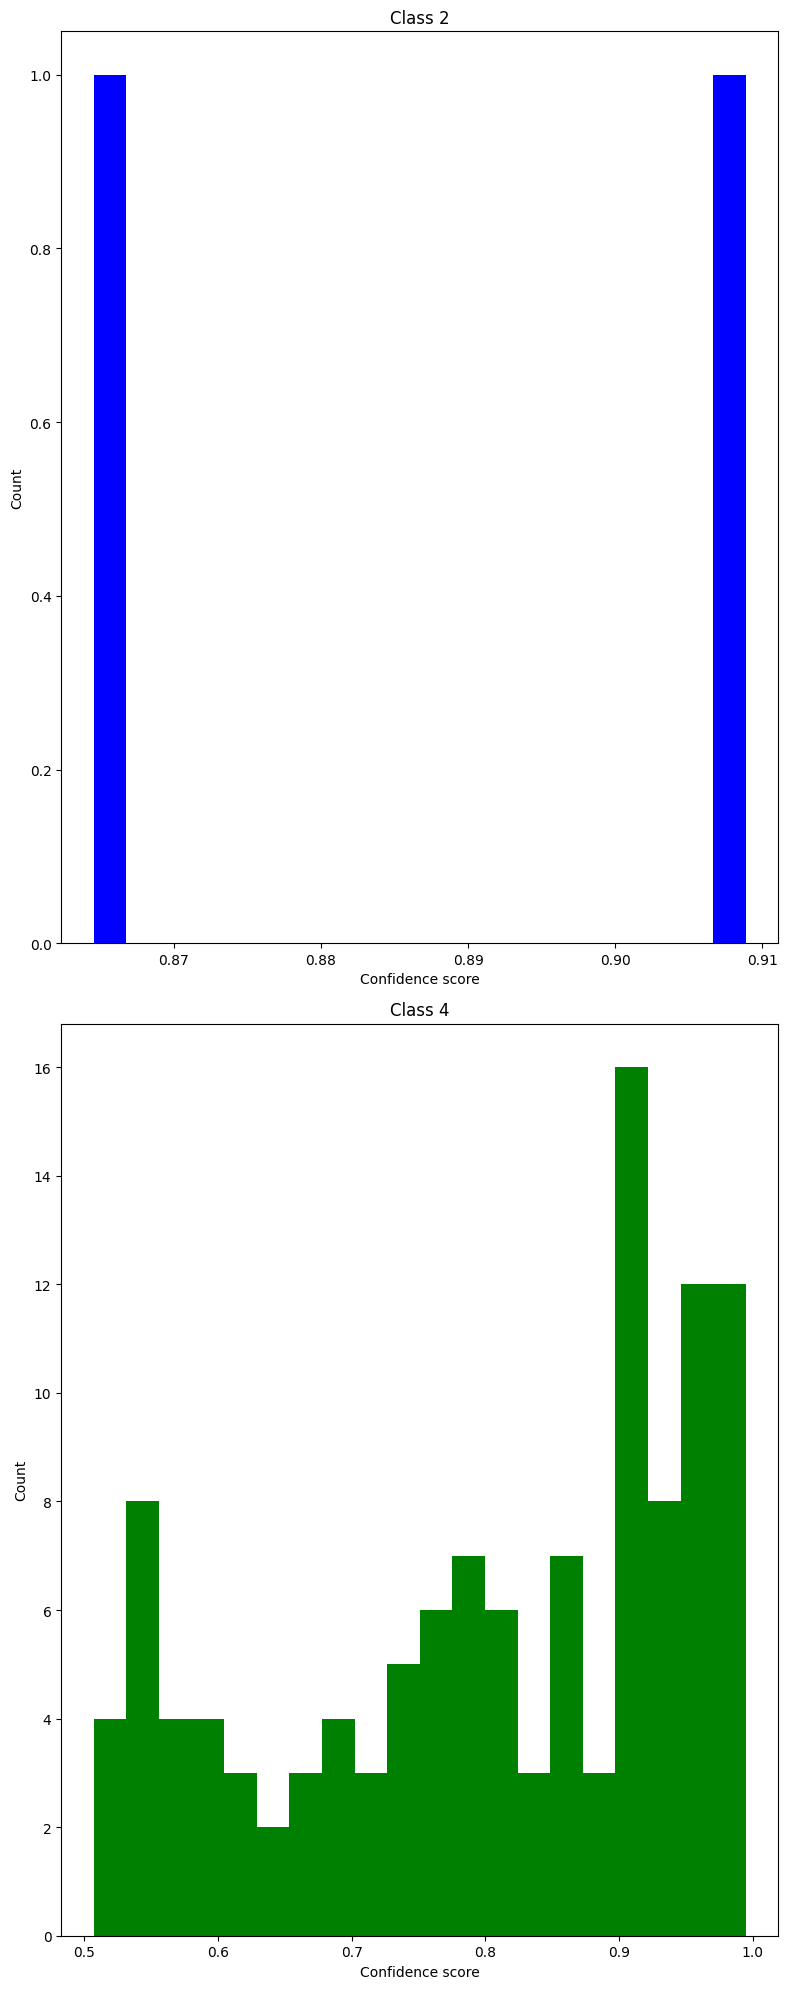

In [20]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\labels\\zerocity_0.5'

# Create an empty dictionary to store the confidence scores for each class
class_scores = {}

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores:
                class_scores[class_num] = []
            class_scores[class_num].append(confidence)

# Sort the class_scores dictionary by class number
class_scores = dict(sorted(class_scores.items()))

# Set the colors for each class histogram
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot a separate histogram for each class
fig, axs = plt.subplots(len(class_scores), figsize=(8, 20))

for i, (class_num, scores) in enumerate(class_scores.items()):
    axs[i].hist(scores, bins=20, color=colors[i % len(colors)])
    axs[i].set_xlabel('Confidence score')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Class {class_num}')

plt.tight_layout()  # Align the subplots
plt.show()

fill_any 각 라벨의 분포

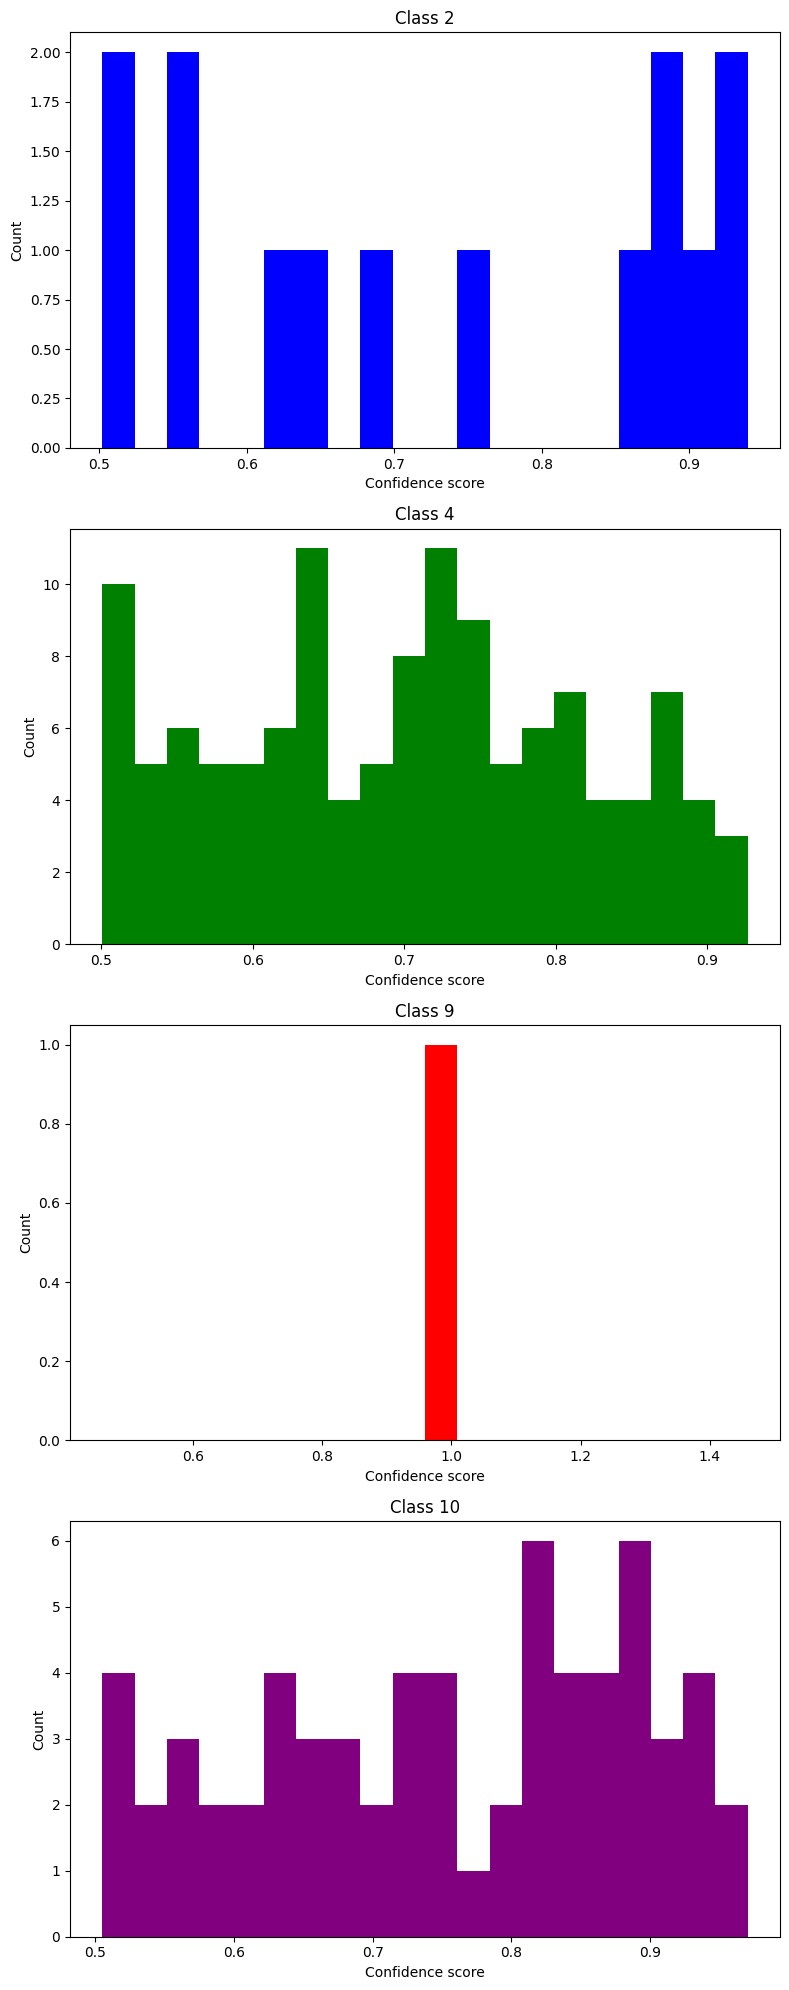

In [21]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\labels\\fillany_0.5'

# Create an empty dictionary to store the confidence scores for each class
class_scores = {}

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores:
                class_scores[class_num] = []
            class_scores[class_num].append(confidence)

# Sort the class_scores dictionary by class number
class_scores = dict(sorted(class_scores.items()))

# Set the colors for each class histogram
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot a separate histogram for each class
fig, axs = plt.subplots(len(class_scores), figsize=(8, 20))

for i, (class_num, scores) in enumerate(class_scores.items()):
    axs[i].hist(scores, bins=20, color=colors[i % len(colors)])
    axs[i].set_xlabel('Confidence score')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Class {class_num}')

plt.tight_layout()  # Align the subplots
plt.show()

두가지 경우 모두 우상향을 하는 confidence score는 아니다 

그러나 truck의 경우 fill_any에서 분포가 다양해지며 검지된 양이 상당히 증가한 것을 보이고

firetruck의 경우 zero_city에서는 전혀 검지가 안되었다가 fill_any에서 51개의 이미지에서 65개의 firetruck을 검지하였다. 가장 유의미함

유의미 했다고 수치적으로 판단한 특수차량인 firetruck, truck과 taxi에 대해서 각 모델별로 비교를 한 시각화를 해보겠음

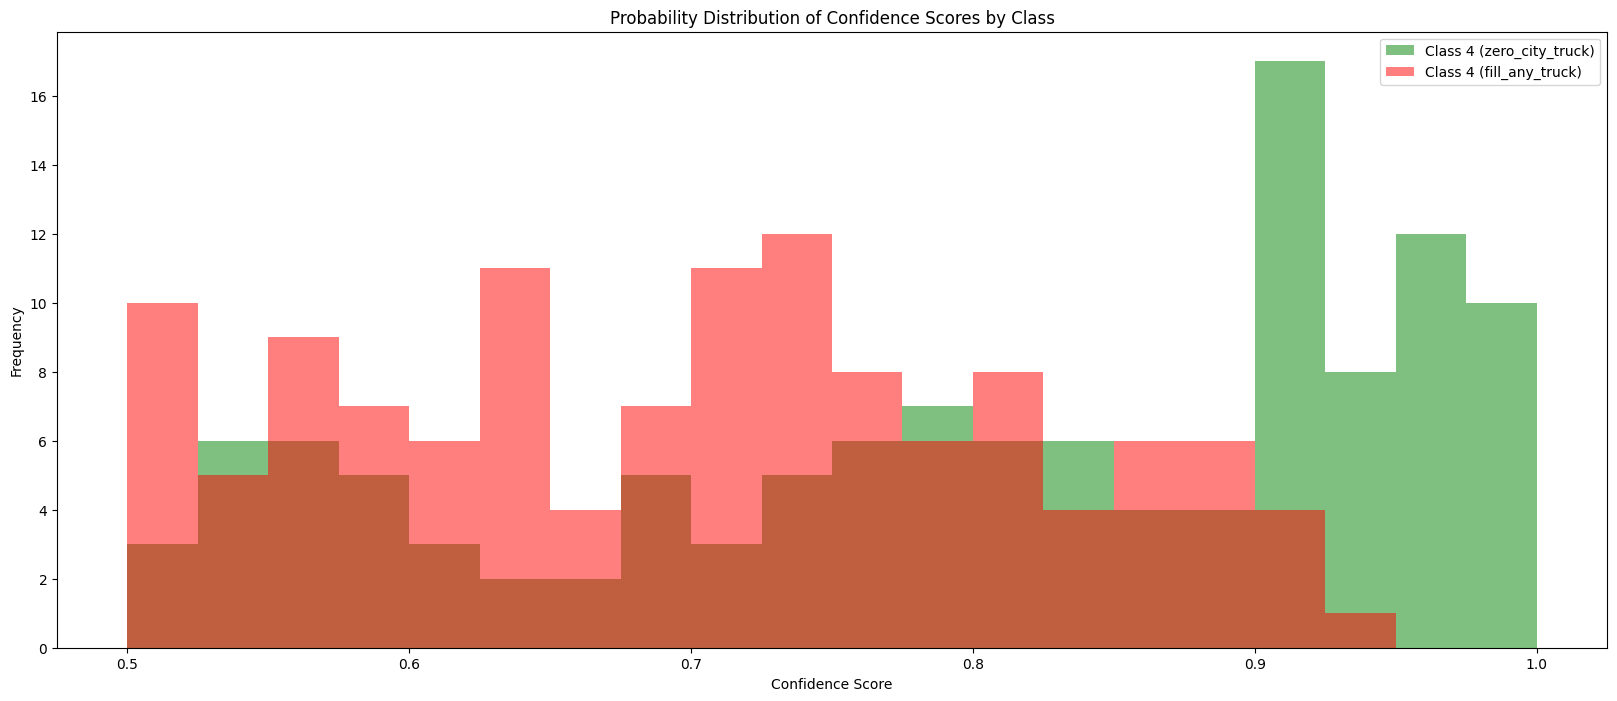

In [22]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path_zero_city = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\zero_city_truck\\labels'
dir_path_fill_any = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\fill_any_truck\\labels'

# Create an empty dictionary to store the confidence scores for each class
class_scores_zero_city = {}
class_scores_fill_any = {}

# Loop through each file in the zero_city_taxi directory
for filename in os.listdir(dir_path_zero_city):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_zero_city, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores_zero_city dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores_zero_city:
                class_scores_zero_city[class_num] = []
            class_scores_zero_city[class_num].append(confidence)

# Loop through each file in the fill_any_taxi directory
for filename in os.listdir(dir_path_fill_any):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_fill_any, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores_fill_any dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores_fill_any:
                class_scores_fill_any[class_num] = []
            class_scores_fill_any[class_num].append(confidence)

fig, ax = plt.subplots(figsize=(20, 8))

# Create a histogram of the confidence scores for each class for zero_city_taxi
for class_num, scores in class_scores_zero_city.items():
    ax.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num} (zero_city_truck)', color='green')

# Create a histogram of the confidence scores for each class for fill_any_taxi
for class_num, scores in class_scores_fill_any.items():
    ax.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num} (fill_any_truck)', color='red')

# Add labels and legend to the plot
ax.set_xlabel('Confidence Score')
ax.set_ylabel('Frequency')
ax.set_title('Probability Distribution of Confidence Scores by Class')
ax.legend()

# Show the plot
plt.show()


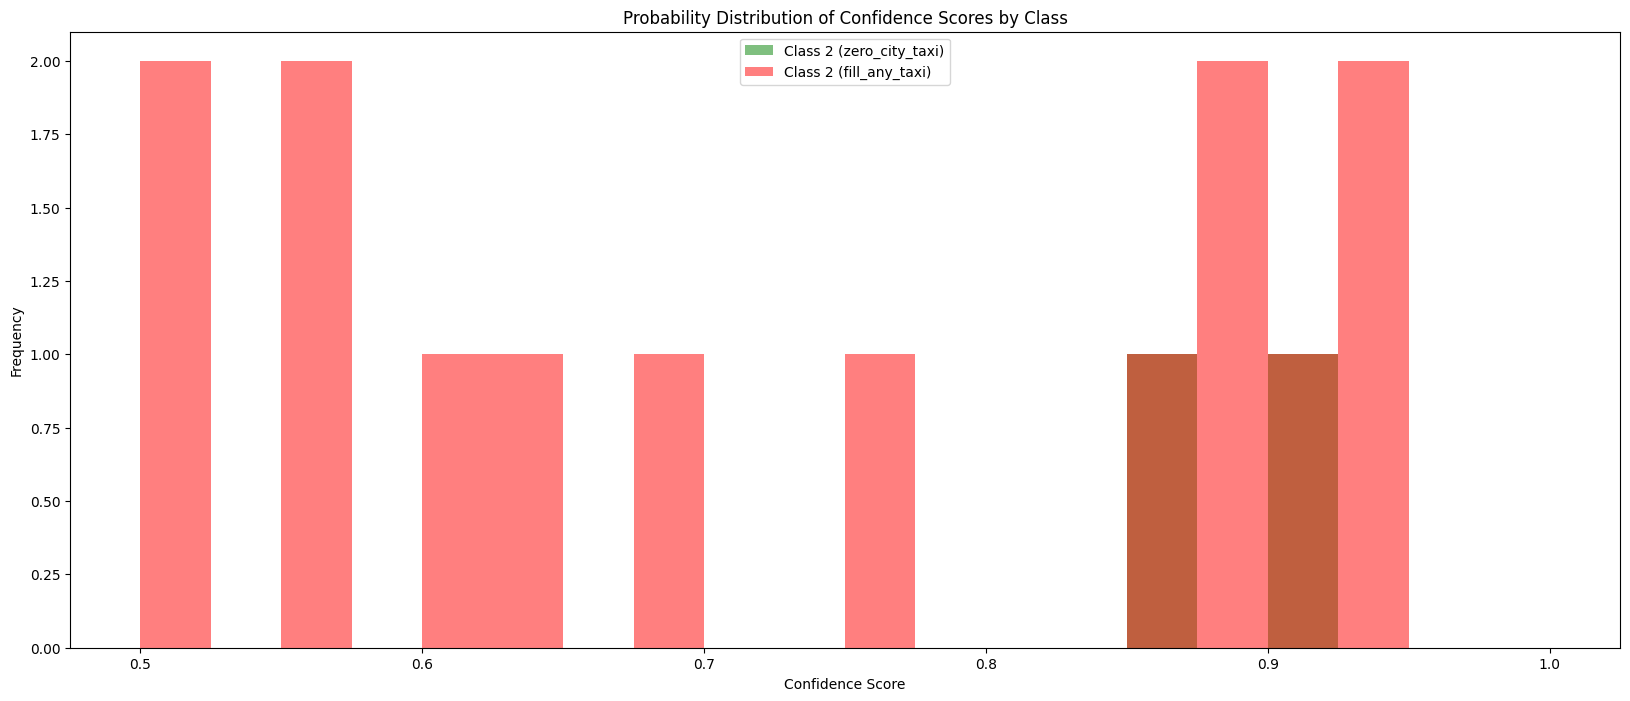

In [23]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path_zero_city = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\zero_city_taxi\\labels'
dir_path_fill_any = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\fill_any_taxi\\labels'

# Create an empty dictionary to store the confidence scores for each class
class_scores_zero_city = {}
class_scores_fill_any = {}

# Loop through each file in the zero_city_taxi directory
for filename in os.listdir(dir_path_zero_city):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_zero_city, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores_zero_city dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores_zero_city:
                class_scores_zero_city[class_num] = []
            class_scores_zero_city[class_num].append(confidence)

# Loop through each file in the fill_any_taxi directory
for filename in os.listdir(dir_path_fill_any):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_fill_any, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores_fill_any dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores_fill_any:
                class_scores_fill_any[class_num] = []
            class_scores_fill_any[class_num].append(confidence)

fig, ax = plt.subplots(figsize=(20, 8))

# Create a histogram of the confidence scores for each class for zero_city_taxi
for class_num, scores in class_scores_zero_city.items():
    ax.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num} (zero_city_taxi)', color='green')

# Create a histogram of the confidence scores for each class for fill_any_taxi
for class_num, scores in class_scores_fill_any.items():
    ax.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num} (fill_any_taxi)', color='red')

# Add labels and legend to the plot
ax.set_xlabel('Confidence Score')
ax.set_ylabel('Frequency')
ax.set_title('Probability Distribution of Confidence Scores by Class')
ax.legend()

# Show the plot
plt.show()


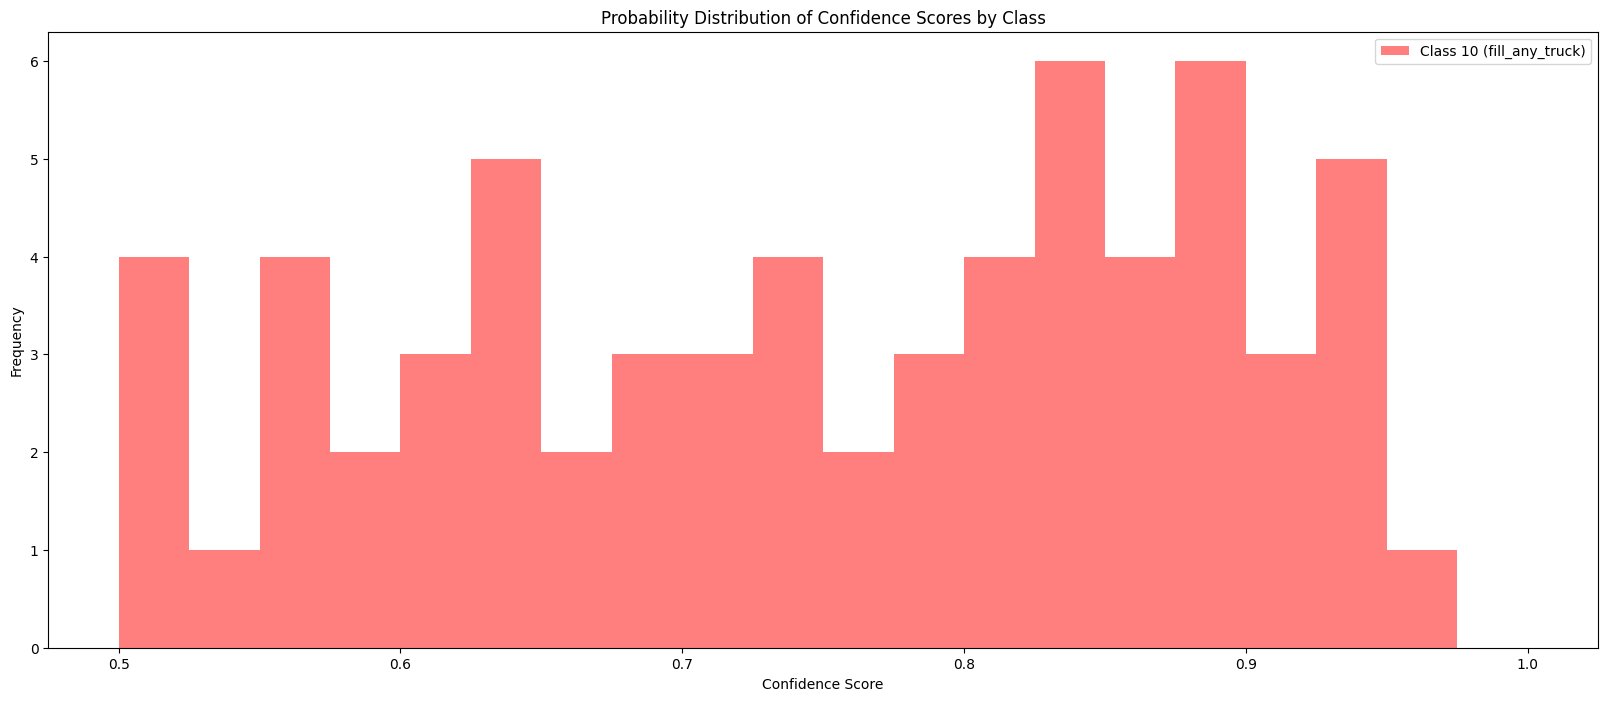

In [27]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path_zero_city = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\zero_city_firetruck\\labels'
dir_path_fill_any = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\fill_any_firetruck\\labels'

# Create an empty dictionary to store the confidence scores for each class
class_scores_zero_city = {}
class_scores_fill_any = {}

# Loop through each file in the zero_city_taxi directory
for filename in os.listdir(dir_path_zero_city):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_zero_city, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores_zero_city dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores_zero_city:
                class_scores_zero_city[class_num] = []
            class_scores_zero_city[class_num].append(confidence)

# Loop through each file in the fill_any_taxi directory
for filename in os.listdir(dir_path_fill_any):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_fill_any, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores_fill_any dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores_fill_any:
                class_scores_fill_any[class_num] = []
            class_scores_fill_any[class_num].append(confidence)

fig, ax = plt.subplots(figsize=(20, 8))

# Create a histogram of the confidence scores for each class for zero_city_taxi
for class_num, scores in class_scores_zero_city.items():
    ax.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num} (zero_city_truck)', color='green')

# Create a histogram of the confidence scores for each class for fill_any_taxi
for class_num, scores in class_scores_fill_any.items():
    ax.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num} (fill_any_truck)', color='red')

# Add labels and legend to the plot
ax.set_xlabel('Confidence Score')
ax.set_ylabel('Frequency')
ax.set_title('Probability Distribution of Confidence Scores by Class')
ax.legend()

# Show the plot
plt.show()


firetruck의 경우 confidence score의 평균의 변화에 대해서 시각화

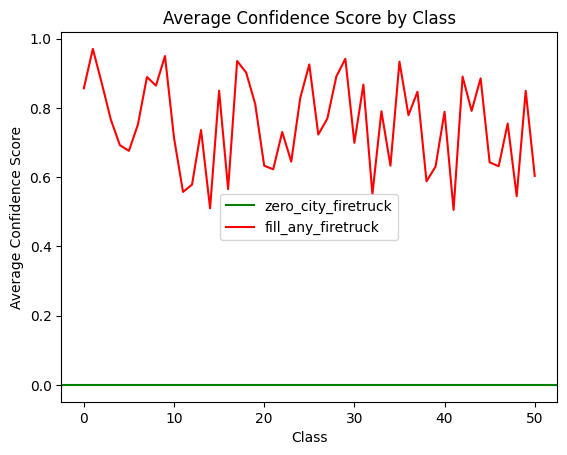

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the directory containing the YOLO detection label files
dir_path_zero_city = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\zero_city_firetruck\\labels'
dir_path_fill_any = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\fill_any_firetruck\\labels'

# Create an empty list to store the average confidence scores for each class
avg_scores_zero_city = []
avg_scores_fill_any = []

# Loop through each file in the zero_city_firetruck directory
for filename in os.listdir(dir_path_zero_city):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_zero_city, filename), 'r') as f:
            lines = f.readlines()

        # Calculate the average confidence score for each class
        class_scores = []
        for line in lines:
            parts = line.strip().split()
            confidence = float(parts[-1])
            class_scores.append(confidence)
        avg_scores_zero_city.append(np.mean(class_scores))

# Check if avg_scores_zero_city is empty
if not avg_scores_zero_city:
    # Add a horizontal line at y=0
    plt.axhline(0, color='green', linestyle='-', label='zero_city_firetruck')

# Loop through each file in the fill_any_firetruck directory
for filename in os.listdir(dir_path_fill_any):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_fill_any, filename), 'r') as f:
            lines = f.readlines()

        # Calculate the average confidence score for each class
        class_scores = []
        for line in lines:
            parts = line.strip().split()
            confidence = float(parts[-1])
            class_scores.append(confidence)
        avg_scores_fill_any.append(np.mean(class_scores))

# Plot the line plot for zero_city_firetruck
# plt.plot(range(len(avg_scores_zero_city)), avg_scores_zero_city, label='zero_city_firetruck', color='green')

# Plot the line plot for fill_any_firetruck
plt.plot(range(len(avg_scores_fill_any)), avg_scores_fill_any, label='fill_any_firetruck', color='red')

# Add labels and legend to the plot
plt.xlabel('Class')
plt.ylabel('Average Confidence Score')
plt.title('Average Confidence Score by Class')
plt.legend(loc='center')

# Show the plot
plt.show()


zero_city의 firetruck은 검지되지 않아 txt 라벨이 없어 평균값을 표시할 수 없어 다음처럼 임의의 라인을 그림 

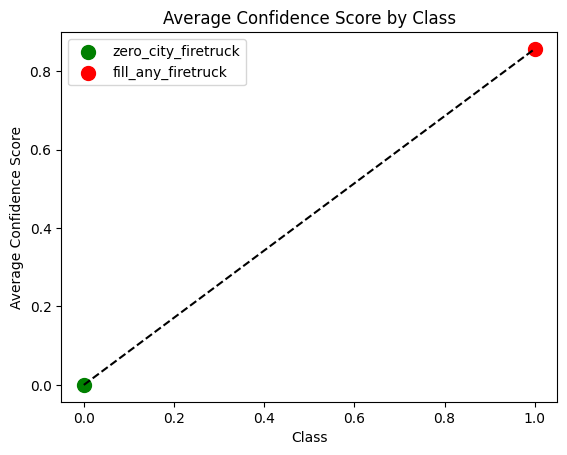

In [10]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path_zero_city = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\zero_city_firetruck\\labels'
dir_path_fill_any = 'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\gyeongi_gen_ai\\confidence\\0.5\\fill_any_firetruck\\labels'

# Calculate the average confidence score for zero_city_firetruck
avg_score_zero_city = 0

# Loop through each file in the zero_city_firetruck directory
for filename in os.listdir(dir_path_zero_city):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_zero_city, filename), 'r') as f:
            lines = f.readlines()

        # Calculate the average confidence score
        total_score = 0
        num_scores = 0
        for line in lines:
            parts = line.strip().split()
            confidence = float(parts[-1])
            total_score += confidence
            num_scores += 1
        avg_score_zero_city = total_score / num_scores
        break

# Calculate the average confidence score for fill_any_firetruck
avg_score_fill_any = 0

# Loop through each file in the fill_any_firetruck directory
for filename in os.listdir(dir_path_fill_any):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path_fill_any, filename), 'r') as f:
            lines = f.readlines()

        # Calculate the average confidence score
        total_score = 0
        num_scores = 0
        for line in lines:
            parts = line.strip().split()
            confidence = float(parts[-1])
            total_score += confidence
            num_scores += 1
        avg_score_fill_any = total_score / num_scores
        break

# Plot the average confidence scores as points
plt.scatter(0, avg_score_zero_city, marker='o', s=100, label='zero_city_firetruck', color='green')
plt.scatter(1, avg_score_fill_any, marker='o', s=100, label='fill_any_firetruck', color='red')
plt.plot([0, 1], [avg_score_zero_city, avg_score_fill_any], linestyle='--', color='black')

# Add labels and legend to the plot
plt.xlabel('Class')
plt.ylabel('Average Confidence Score')
plt.title('Average Confidence Score by Class')
plt.legend()

# Show the plot
plt.show()
